<a href="https://colab.research.google.com/github/ayyucedemirbas/KEGG_Pathway_Enrichment_Analysis/blob/main/kegg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
if (!require("BiocManager", quietly = TRUE))
     install.packages("BiocManager")
BiocManager::install("clusterProfiler")
BiocManager::install("org.Hs.eg.db")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.27), R 4.5.2 (2025-10-31)

Installing package(s) 'BiocVersion', 'clusterProfiler'

also installing the dependencies ‘fontBitstreamVera’, ‘fontLiberation’, ‘formatR’, ‘fontquiver’, ‘XVector’, ‘Seqinfo’, ‘lambda.r’, ‘futile.options’, ‘gridGraphics’, ‘tweenr’, ‘polyclip’, ‘lazyeval’, ‘gdtools’, ‘plogr’, ‘png’, ‘Biostrings’, ‘futile.logger’, ‘snow’, ‘BH’, ‘cowplot’, ‘fastmatch’, ‘ggplotify’, ‘patchwork’, ‘ggforce’, ‘ape’, ‘tidytree’, ‘treeio’, ‘ggiraph’, ‘R.oo’, ‘R.methodsS3’, ‘BiocGenerics’, ‘Biobase’, ‘IRanges’, ‘RSQLite’, ‘S4Vectors’, ‘KEGGREST’, ‘BiocParallel’, ‘fgsea’, ‘reshape2’, ‘aplot’, ‘ggfun’, ‘ggnewscale’, ‘ggrepel’, ‘ggtangle’, ‘tidydr’, ‘scatterpie’, ‘ggtree’, ‘R

In [2]:
library(clusterProfiler)
library(org.Hs.eg.db)



clusterProfiler v4.18.4 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

S Xu, E Hu, Y Cai, Z Xie, X Luo, L Zhan, W Tang, Q Wang, B Liu, R Wang,
W Xie, T Wu, L Xie, G Yu. Using clusterProfiler to characterize
multiomics data. Nature Protocols. 2024, 19(11):3292-3320


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: generics


Attaching package: ‘generics’


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union



Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames

In [3]:
my_genes <- c("TP53", "EGFR", "TNF", "IL6", "VEGFA", "MYC", "GAPDH")

In [4]:
gene_entrez <- bitr(my_genes,
                    fromType = "SYMBOL",
                    toType   = "ENTREZID",
                    OrgDb    = org.Hs.eg.db)

'select()' returned 1:1 mapping between keys and columns



In [5]:
print(head(gene_entrez))

  SYMBOL ENTREZID
1   TP53     7157
2   EGFR     1956
3    TNF     7124
4    IL6     3569
5  VEGFA     7422
6    MYC     4609


In [6]:
kegg_results <- enrichKEGG(
    gene         = gene_entrez$ENTREZID,
    organism     = 'hsa',
    pvalueCutoff = 0.05,
    qvalueCutoff = 0.2
)

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...

kegg_category.rda is not found, download it online...



In [7]:
head(kegg_results@result)

,category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05163,Human Diseases,Infectious disease: viral,hsa05163,Human cytomegalovirus infection,6/7,227/9521,0.02643172,35.95091,14.456263,1.180800e-09,1.664928e-07,5.344673e-08,7157/1956/7124/3569/7422/4609,6
hsa05219,Human Diseases,Cancer: specific types,hsa05219,Bladder cancer,4/7,41/9521,0.09756098,132.69686,22.921821,1.026231e-08,7.234929e-07,2.322523e-07,7157/1956/7422/4609,4
hsa05205,Human Diseases,Cancer: overview,hsa05205,Proteoglycans in cancer,5/7,204/9521,0.02450980,33.33683,12.663696,8.723673e-08,4.100126e-06,1.316203e-06,7157/1956/7124/7422/4609,5
hsa04066,Environmental Information Processing,Signal transduction,hsa04066,HIF-1 signaling pathway,4/7,110/9521,0.03636364,49.45974,13.865817,5.748842e-07,1.689828e-05,5.424607e-06,1956/3569/7422/2597,4
hsa04010,Environmental Information Processing,Signal transduction,hsa04010,MAPK signaling pathway,5/7,300/9521,0.01666667,22.66905,10.344211,5.992299e-07,1.689828e-05,5.424607e-06,7157/1956/7124/7422/4609,5
hsa04151,Environmental Information Processing,Signal transduction,hsa04151,PI3K-Akt signaling pathway,5/7,362/9521,0.01381215,18.78650,9.358511,1.524691e-06,3.583023e-05,1.150205e-05,7157/1956/3569/7422/4609,5


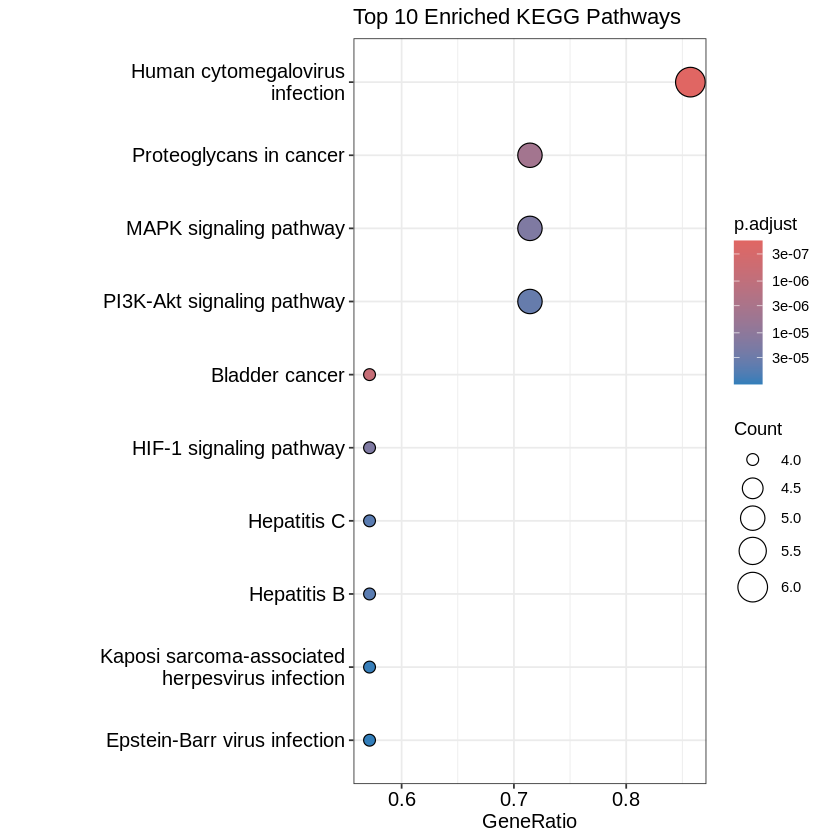

In [8]:
dotplot(kegg_results, showCategory=10, title="Top 10 Enriched KEGG Pathways")

Warning message in (function (model, data, ...) :
“Arguments in `...` must be used.
✖ Problematic argument:
• by = "Count"
ℹ Did you misspell an argument name?”


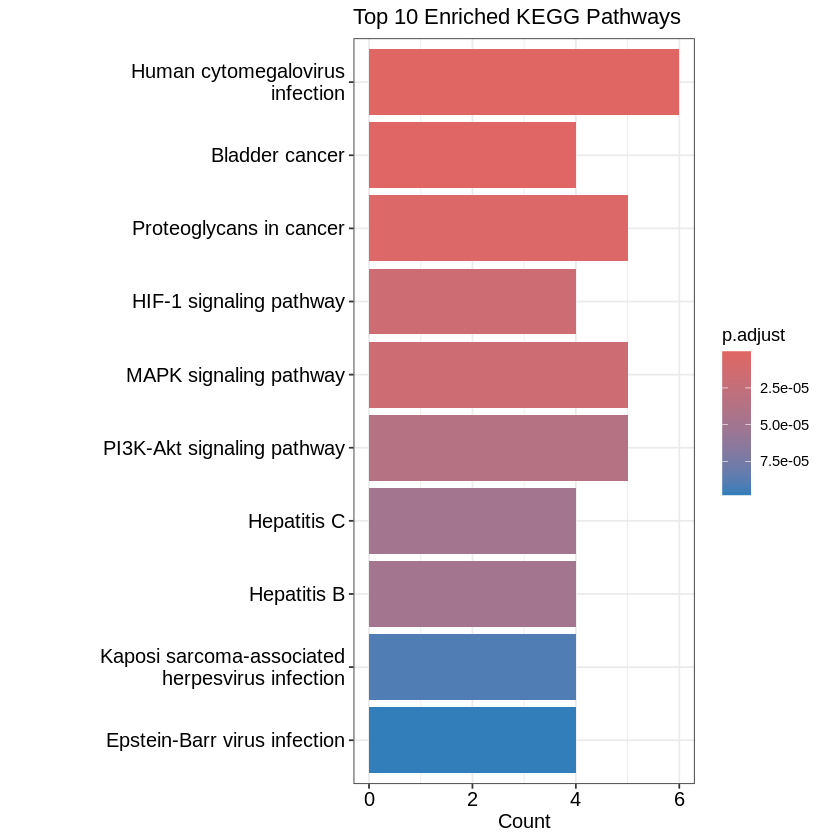

In [9]:
barplot(kegg_results, showCategory=10, title="Top 10 Enriched KEGG Pathways")